# Code Example from Time Series Talk: Autoregressive Model (AR)

In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

## Ice Cream Production Data

### Parsing and Preprocessing

In [3]:
# Read data as CSV
df_ice_cream = pd.read_csv('data/ice_cream.csv')

In [4]:
# Rename columns
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)
df_ice_cream['date']  = pd.to_datetime(df_ice_cream['date'])
df_ice_cream.set_index('date', inplace=True)

In [5]:
df_ice_cream.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [6]:
# Infer the frequency of the data
df_ice_cream = df_ice_cream.asfreq(pd.infer_freq(df_ice_cream.index))

In [7]:
# Just take data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

### Visualization

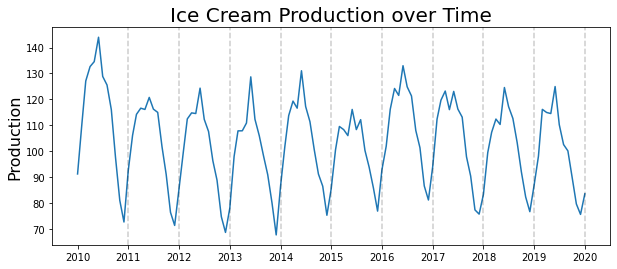

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### Autoregressive Model
As we saw in the ACF/PACF assignment we should create a model using lags 1, 2 and 3


In [12]:
# Split dataset into training and test sets
train_end = pd.to_datetime('2018-12-01')
test_end = pd.to_datetime('2019-12-01')

train_data = df_ice_cream[:train_end]
test_data = df_ice_cream[train_end:test_end]

In [13]:
# Fit the AR model
ar_model = ARMA(train_data, order=(3,0))
model_fit = ar_model.fit()

/Users/jfurrer/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [14]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             production   No. Observations:                  108
Model:                     ARMA(3, 0)   Log Likelihood                -374.085
Method:                       css-mle   S.D. of innovations              7.642
Date:                Mon, 28 Feb 2022   AIC                            758.170
Time:                        18:31:04   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.5743      1.809     57.265      0.000     100.029     107.119
ar.L1.production     1.0469      0.088     11.960      0.000       0.875       1.218
ar.L2.production    -0.0523 

In [38]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data.values.reshape((test_data.shape[0], 1)) - predictions.values.reshape((predictions.shape[0], 1))

/Users/jfurrer/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0, 0.5, 'Error')

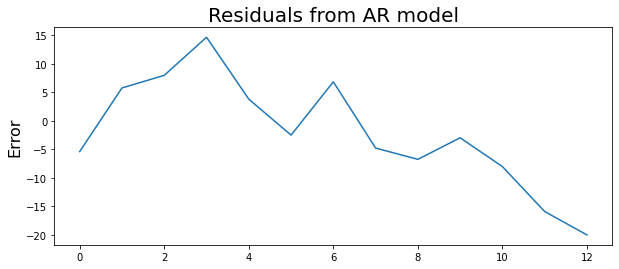

In [43]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR model', fontsize=20)
plt.ylabel('Error', fontsize=16)
#plt.axhline(0, color='r', linestyle='--', alpha=0.2)
#for year in range(2019, 2021):
#    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [46]:
# Metrics
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error:  9.613104913458697
